In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

data = {
    "X": [0.5700, -1.2400, 1.5000, 0.6500, -0.9800, 1.3200, -0.4200, -1.8700, 0.7100, 1.1500,
          -0.5100, 1.6800, -1.3300, 0.9500, -0.6400, 1.4300, -0.7400, 1.1000, -1.5200, 0.8200,
          -0.2100, 1.3000, -1.0400, 0.5600, -0.9400, 1.2800, -1.1600, 0.7300, -0.3800, 1.5900],
    "Y": [0.8400, -0.2100, -0.9400, 0.5200, -0.7800, 0.6300, -0.3300, 0.2200, -0.4700, 0.2900,
          -0.9100, 0.4400, 0.8000, -0.6600, 0.7100, -0.4300, 0.5500, -0.2800, 0.3300, -0.5700,
          0.2700, -0.6200, 0.7500, -0.1100, 0.6700, -0.5300, 0.8200, -0.6500, 0.3800, -0.1400],
    "class": [0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 
              0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0,
              1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0]
}


In [3]:
df = pd.DataFrame(data)

In [5]:
df.head()

,X,Y,class
0,0.57,0.84,0.0
1,-1.24,-0.21,1.0
2,1.50,-0.94,0.0
3,0.65,0.52,1.0
4,-0.98,-0.78,1.0


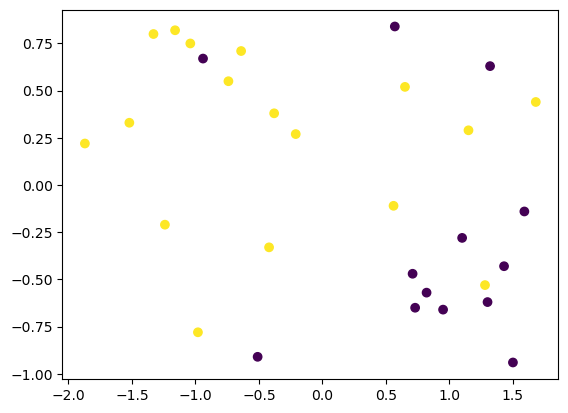

In [8]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [9]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [10]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [11]:
model = Sequential()

model.add(Dense(2,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()


c:\Users\ACER\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Set parameters to 0
model.get_weights()

[array([[ 0.49098778, -0.21262884],
        [ 0.18538296, -0.61854595]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.9942435 ],
        [0.23543632]], dtype=float32),
 array([0.], dtype=float32)]

In [13]:
initial_weights = model.get_weights()

In [15]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.zeros(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.zeros(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.zeros(model.get_weights()[3].shape)*0.5

In [16]:
model.set_weights(initial_weights)

In [17]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [18]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.4167 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - accuracy: 0.5833 - loss: 0.6930 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.5833 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.5833 - loss: 0.6927 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.5833 - loss: 0.6925 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - accuracy: 0.5833 - loss: 0.6923 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.5833 - loss: 0.6922 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - accuracy: 0.5833 - loss: 0.6920 - val_accuracy: 0.5000 - val_

In [20]:
model.get_weights()

[array([[-0.13228352, -0.13228352],
        [ 0.13201259,  0.13201259]], dtype=float32),
 array([0.12284515, 0.12284515], dtype=float32),
 array([[0.09663874],
        [0.09663874]], dtype=float32),
 array([0.08705103], dtype=float32)]